In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


**CLEANING DATA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.isna().sum().sort_values()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

**DATA VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


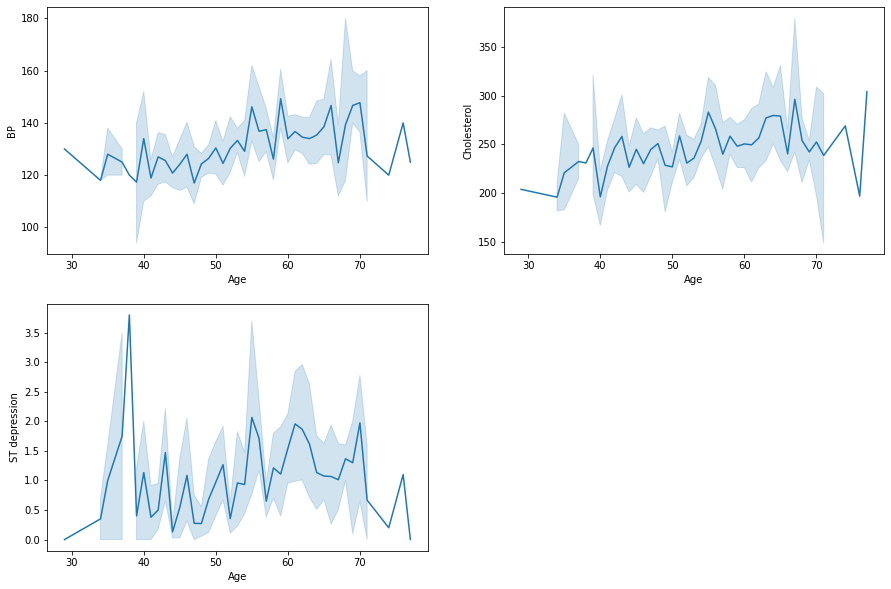

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot('Age','BP',data=df)
plt.subplot(2,2,2)
sns.lineplot('Age','Cholesterol',data=df)
plt.subplot(2,2,3)
sns.lineplot('Age','ST depression',data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


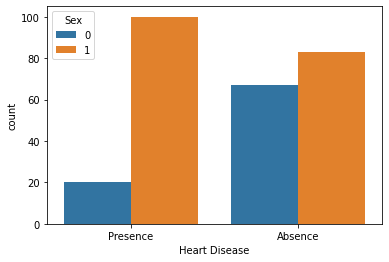

In [ ]:
sns.countplot('Heart Disease',hue='Sex',data=df)
plt.show()

**Transforming The target column converting it into numeric data using labelencoder**

In [ ]:
label=LabelEncoder()
df['Heart Disease']=label.fit_transform(df['Heart Disease'])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


**Visualizing the correlation between the features**

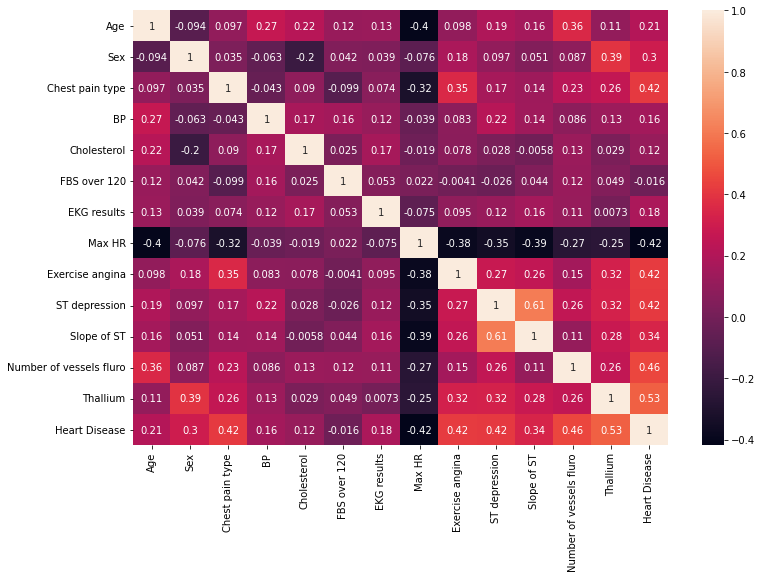

In [ ]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True)
plt.show()

**Dropping the columns which are less correlated with the target variable**

In [ ]:
df=df.drop(['Max HR','FBS over 120'],axis=1)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,2,0,2.4,2,3,3,1
1,67,0,3,115,564,2,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,0.3,1,0,7,1
3,64,1,4,128,263,0,1,0.2,2,1,7,0
4,74,0,2,120,269,2,1,0.2,1,1,3,0


**K Nearest Neighbors**

In [ ]:
x=df.drop('Heart Disease',axis=1).values
y=df['Heart Disease']
params={'n_neighbors':[3,5,7,9,10,11,12,13,14,15,16,17,18,19,20]}
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

knn=KNeighborsClassifier()
kf=KFold(n_splits=6,shuffle=True)
cv=GridSearchCV(knn,params,cv=kf,scoring='accuracy')
cv.fit(xtrain,ytrain)

cv.best_score_




0.6387403446226976

**LogisticRegression**

In [ ]:
steps=[('scaler',StandardScaler()),('logistic Regression',LogisticRegression())]
pipeline=Pipeline(steps)
pipeline.fit(xtrain,ytrain)
pipeline.score(xtest,ytest)

# cv=GridSearchCV(pipeline,param,cv=kf,scoring='accuracy')
# cv.fit(xtrain,ytrain)
# cv.best_score_

0.8382352941176471

In [ ]:
scaler=StandardScaler()
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
xtrain_scale=scaler.fit_transform(xtrain)
xtest_Scale=scaler.transform(xtest)
param={'C':[1,5,6,7,8,9,10,11,15]}
logreg=LogisticRegression()
# res=[]
# for param in par:
#   logreg=LogisticRegression(C=param)
#   kf=KFold(n_splits=6,shuffle=True)
#   cv=cross_val_score(logreg,xtrain_scale,ytrain,cv=kf)
#   res.append(cv)
# res
cv=GridSearchCV(logreg,param,cv=kf,scoring='accuracy')
cv.fit(xtrain_scale,ytrain)
cv.best_score_

0.8625672043010754

In [ ]:
# models={'KNN':{'model':KNeighborsClassifier(),
#                'params':{'n_neighbors':[3,5,7,9,10,11,12,13,14,15,16,17,18,19,20]}}
#         ,'Logistic Regression':{'model':LogisticRegression(),
#                                 'params':{'C':[1,5,10]}}}
# #steps={('Scaler':StandardScaler),('')}
# x=df.drop('Heart Disease',axis=1).values
# y=df['Heart Disease']
# xtrain,xtest,ytrain,ytest=train_test_split(x,y)
# result=[]
# for name,model in models.items():
#   m=GridSearchCV(model['model'],model['params'],cv=5)
#   m.fit(xtrain,ytrain)
#   result.append({'model':name,'best_score':m.best_score_,'best_params':m.best_params_})

#   # kf=KFold(n_splits=6,shuffle=True)
#   # cv=cross_val_score(model,xtrain,ytrain,cv=kf)
#   # result.append(cv)

# r=pd.DataFrame(result,columns=['model','best_Score','best_params'])
# r

,model,best_Score,best_params
0,KNN,NaN,{'n_neighbors': 15}
1,Logistic Regression,NaN,{'C': 1}
